In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv("purchase_behaviour.csv")
df2 = pd.read_csv("transaction_data.csv")

df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
df = pd.merge(df1, df2, how='inner', on='LYLTY_CARD_NBR')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [8]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,43464.036260,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,105.389282,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,43282.000000,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,43464.000000,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,43555.000000,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [9]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

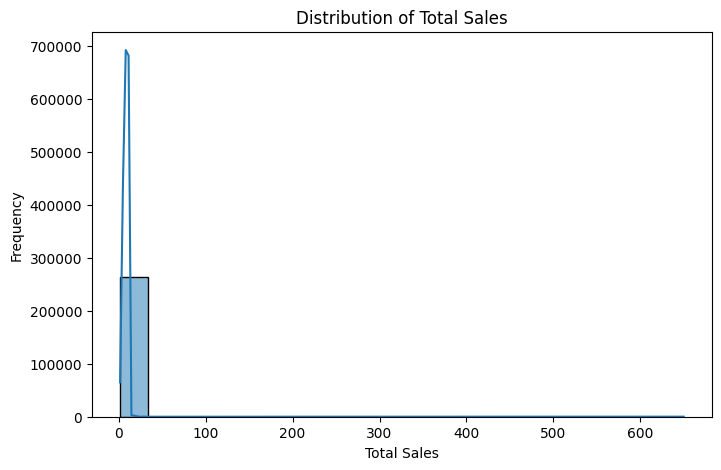

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TOT_SALES'], bins=20, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

In [7]:
product_sales = df.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
top_products = product_sales.nlargest(3, 'TOT_SALES')
top_products

,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


/tmp/ipykernel_161058/466173912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products, palette='viridis')


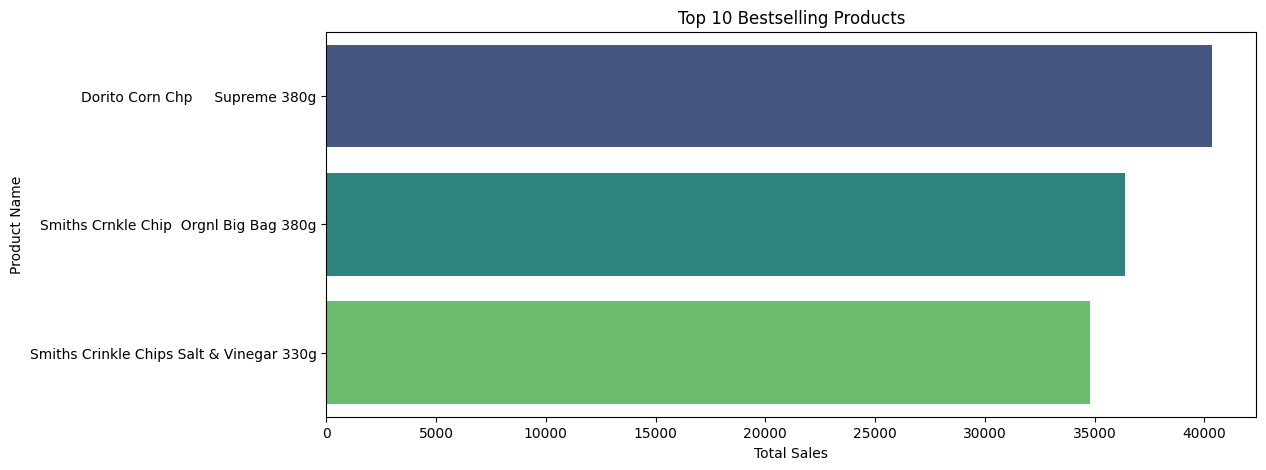

In [14]:
plt.figure(figsize=(12, 5))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products, palette='viridis')
plt.title('Top 10 Bestselling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

In [17]:
loyal_customers = df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES': 'sum', 'LIFESTAGE': 'first', 'PREMIUM_CUSTOMER': 'first'}).reset_index()
loyal_customers = loyal_customers[loyal_customers['TOT_SALES'] > loyal_customers['TOT_SALES'].quantile(0.8)]
loyal_customers.reset_index()


,index,LYLTY_CARD_NBR,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,662,3004,48.0,RETIREES,Premium
1,665,3007,48.4,MIDAGE SINGLES/COUPLES,Mainstream
2,672,3014,68.0,YOUNG SINGLES/COUPLES,Mainstream
3,673,3015,53.6,YOUNG FAMILIES,Budget
4,679,3022,80.9,YOUNG FAMILIES,Budget
...,...,...,...,...,...
14479,72469,272208,48.1,OLDER FAMILIES,Premium
14480,72477,272218,58.8,RETIREES,Budget
14481,72481,272223,46.8,OLDER SINGLES/COUPLES,Budget
14482,72580,272361,47.6,OLDER SINGLES/COUPLES,Mainstream


/tmp/ipykernel_161058/1568083980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LIFESTAGE', data=loyal_customers, order=loyal_customers['LIFESTAGE'].value_counts().index, palette='Set2')


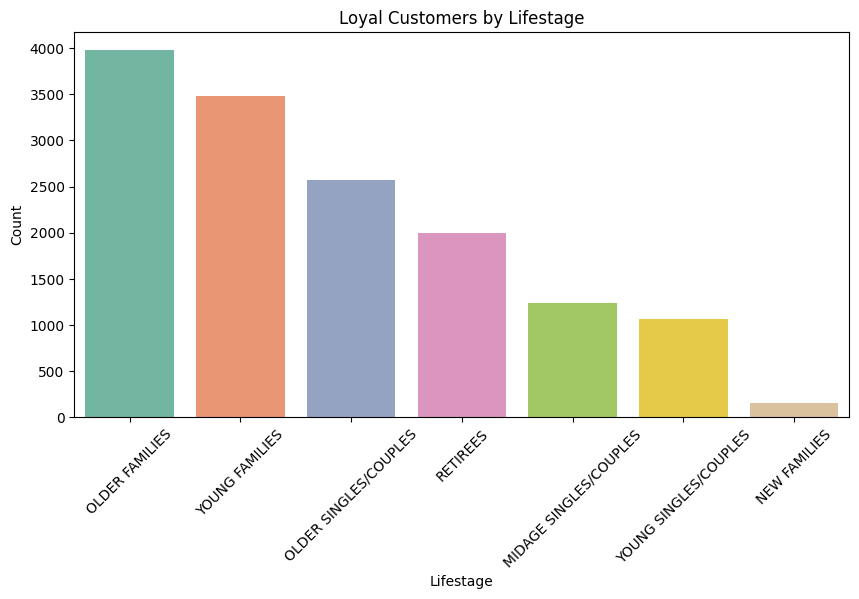

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='LIFESTAGE', data=loyal_customers, order=loyal_customers['LIFESTAGE'].value_counts().index, palette='Set2')
plt.title('Loyal Customers by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_161058/932899174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PREMIUM_CUSTOMER', data=loyal_customers, palette='coolwarm')


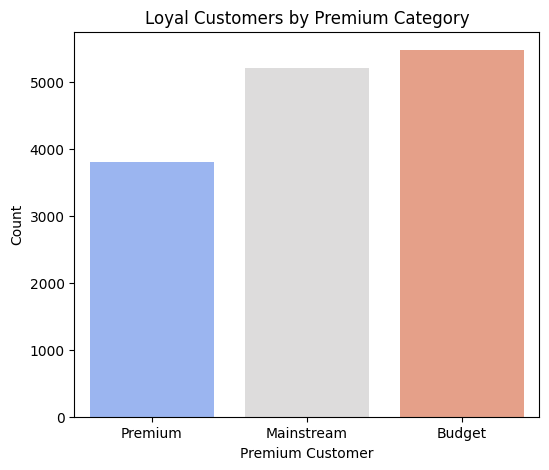

In [19]:
plt.figure(figsize=(6, 5))
sns.countplot(x='PREMIUM_CUSTOMER', data=loyal_customers, palette='coolwarm')
plt.title('Loyal Customers by Premium Category')
plt.xlabel('Premium Customer')
plt.ylabel('Count')
plt.show()

In [21]:
loyal_characteristics = loyal_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')
loyal_characteristics


,LIFESTAGE,PREMIUM_CUSTOMER,Count
0,MIDAGE SINGLES/COUPLES,Budget,216
1,MIDAGE SINGLES/COUPLES,Mainstream,650
2,MIDAGE SINGLES/COUPLES,Premium,376
3,NEW FAMILIES,Budget,73
4,NEW FAMILIES,Mainstream,56
5,NEW FAMILIES,Premium,27
6,OLDER FAMILIES,Budget,1887
7,OLDER FAMILIES,Mainstream,1168
8,OLDER FAMILIES,Premium,921
9,OLDER SINGLES/COUPLES,Budget,880


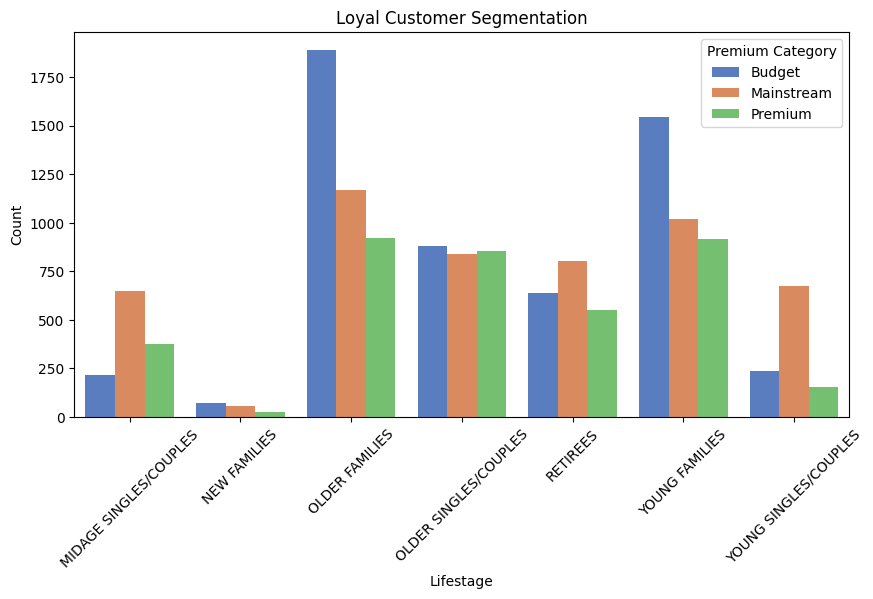

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x='LIFESTAGE', y='Count', hue='PREMIUM_CUSTOMER', data=loyal_characteristics, palette='muted')
plt.title('Loyal Customer Segmentation')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Premium Category')
plt.show()